# Problem 1

Using your Forward Euler method, simulate the solution to the normalized SIS model.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy

In [16]:
def SIS(s0, i0, beta, gamma, t_max, stepsize):
  T = np.arange(0, t_max+stepsize, stepsize)
  s = np.zeros(len(T))
  i = np.zeros(len(T))
  
  for idx, t in enumerate(T):
    if (idx == 0):
      s[idx] = s0
      i[idx] = i0
    else:
      ds_dt = -beta*s[idx - 1]*i[idx - 1] + gamma*i[idx - 1]
      di_dt = beta*s[idx - 1]*i[idx - 1] - gamma*i[idx - 1]
      
      s[idx] = s[idx - 1] + ds_dt*stepsize
      i[idx] = i[idx - 1] + di_dt*stepsize
  
  return s, i, T

In [17]:
i0 = 0.01
s0 = 0.99
beta = 3
gamma = 2
R_naught = beta/gamma

(0.0, 27.3)

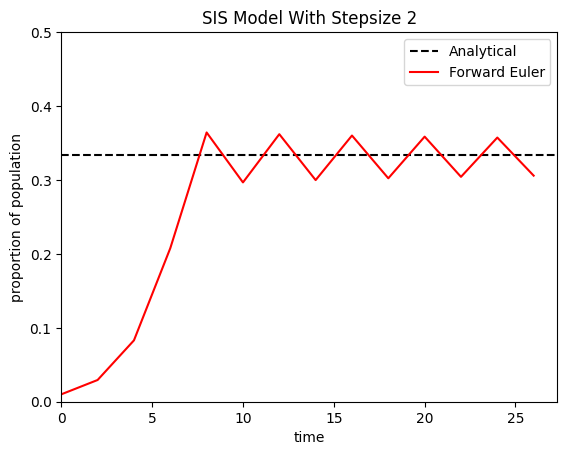

In [22]:
S, I, T = SIS(s0, i0, beta, gamma, 25, 2)

# produce a plot that captures the dynamics of transmission over the appropriate amount of time for the population to grow by 50% to a total of N = 1500
fig, ax = plt.subplots()
ax.axhline(y = 1 - 1/R_naught, color='black', linestyle='--', label='Analytical')
ax.plot(T, I, color='r', label='Forward Euler')
ax.set_xlabel('time')
ax.set_ylabel('proportion of population')
ax.set_title('SIS Model With Stepsize 2')
ax.legend()
ax.set_ylim(top = 0.5, bottom=0)
ax.set_xlim(left=0)

(0.0, 26.25)

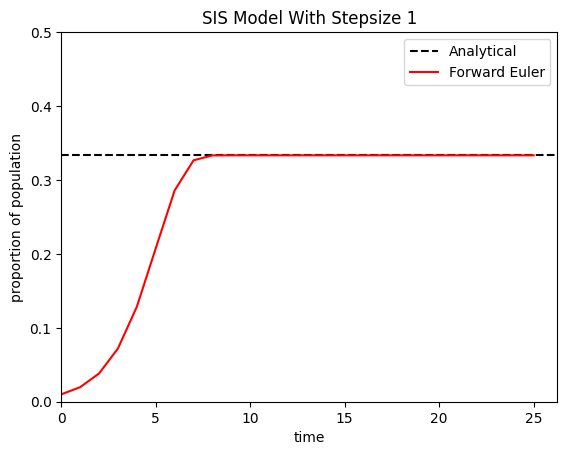

In [23]:
S, I, T = SIS(s0, i0, beta, gamma, 25, 1)

# produce a plot that captures the dynamics of transmission over the appropriate amount of time for the population to grow by 50% to a total of N = 1500
fig, ax = plt.subplots()
ax.axhline(y = 1 - 1/R_naught, color='black', linestyle='--', label='Analytical')
ax.plot(T, I, color='r', label='Forward Euler')
ax.set_xlabel('time')
ax.set_ylabel('proportion of population')
ax.set_title('SIS Model With Stepsize 1')
ax.legend()
ax.set_ylim(top = 0.5, bottom=0)
ax.set_xlim(left=0)

(0.0, 26.25)

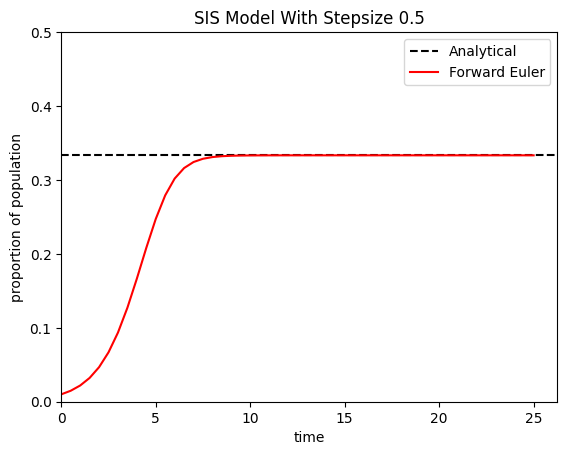

In [24]:
S, I, T = SIS(s0, i0, beta, gamma, 25, 0.5)

# produce a plot that captures the dynamics of transmission over the appropriate amount of time for the population to grow by 50% to a total of N = 1500
fig, ax = plt.subplots()
ax.axhline(y = 1 - 1/R_naught, color='black', linestyle='--', label='Analytical')
ax.plot(T, I, color='r', label='Forward Euler')
ax.set_xlabel('time')
ax.set_ylabel('proportion of population')
ax.set_title('SIS Model With Stepsize 0.5')
ax.legend()
ax.set_ylim(top = 0.5, bottom=0)
ax.set_xlim(left=0)

In [38]:
def iAnalytical(i0, beta, gamma, t_max, stepsize):
  T = np.arange(0, t_max+stepsize, stepsize)
  i = np.zeros(len(T))
  
  for idx, t in enumerate(T):
    R0 = beta/gamma
    asol = 1 - 1/R0
    
    den = 1 + (asol - i0)/(i0) * np.exp(-t*(beta - gamma))
    i[idx] = asol/den
    
  return i
       

def error(s0, i0, beta, gamma, t_max, stepsize):
  R0 = beta/gamma
  S, I, T = SIS(s0, i0, beta, gamma, t_max, stepsize)
  I1 = iAnalytical(i0, beta, gamma, t_max, stepsize)
    
  maxError = -1
  for idx, t in enumerate(T):
    val = np.abs(I[idx] - I1[idx])
    if (val > maxError):
      maxError = val
  
  return maxError

Text(0.5, 1.0, 'Absolute Error vs. Stepsize')

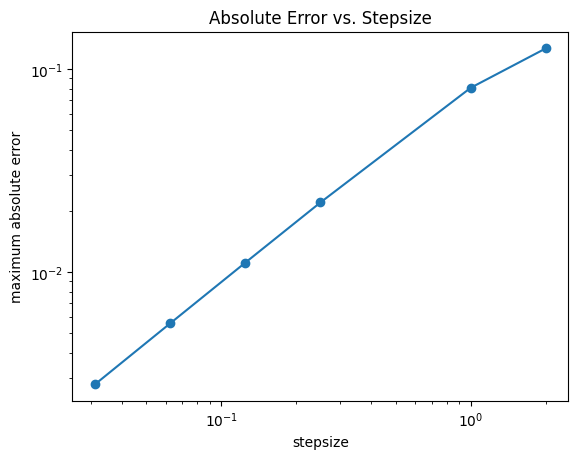

In [43]:
x = [0.03125, 0.0625, 0.125, 0.25, 1, 2]
y = []
for xval in x:
  y.append(error(0.99, 0.01, 3, 2, 25, xval))

fig, ax = plt.subplots()
#ax.plot(x, y, marker='o')
ax.loglog(x, y, marker='o')
ax.set_xlabel('stepsize')
ax.set_ylabel('maximum absolute error')
ax.set_title('Absolute Error vs. Stepsize')

# Problem 2

### For Dan Pemic:

- 200 faculty
- 1800 students
- $C_{11}$ = 3.1
- $C_{12}$ = 43.5
- $C_{21}$ = 4.7
- $C_{22}$ = 25.0

Each faculty member comes into contact with 3.1 faculty members and 43.5 students:
$$200 * (3.1 + 43.5) = 200 * 46.6 = 9320$$

Each student comes into contact with about 4.7 faculty members and 25 students:
$$1800 * (4.7 + 25) = 1800 * (29.7) = 53460$$

So, the total number of estimated contacts is 62,780. The number of contacts between groups should be roughly the same.

Faculty members coming into contact with students: $200 * 43.5 = 8700$.

Students coming into contact with faculty members is: $1800 * 4.7 = 8460$

The relative error of these contact rates over the total number of contact rates is:
$$\frac{|8700 - 8460|}{62780} = 0.38 \%$$

### For Flynn Uenza:

- 210 faculty
- 1750 students
- $C_{11}$ = 3.0
- $C_{12}$ = 44.5
- $C_{21}$ = 4.8
- $C_{22}$ = 25.1

Each faculty member comes into contact with 3.0 faculty members and 44.5 students:
$$210 * (3.0 + 44.5) = 210 * 47.5 = 9975$$

Each student comes into contact with about 4.7 faculty members and 25 students:
$$1750 * (4.8 + 25.1) = 1750 * (29.9) = 52325$$

So, the total number of estimated contacts is 62,300. The number of contacts between groups should be roughly the same.

Faculty members coming into contact with students: $210 * 44.5 = 9345$.

Students coming into contact with faculty members is: $1750 * 4.8 = 8400$

The relative error of these contact rates over the total number of contact rates is:
$$\frac{|9345 - 8400|}{62300} = 1.51 \%$$


Since Dan's counts and contact matrix have a lower relative error, I would trust Dan more.

## For Dan Pemic:

Based on the above, the average is $\frac{8700+8460}{2} = 8580$

So, the contact rate from students to faculty is $\frac{8580}{1800} = 4.8$, and the contact rate from faculty to students is $\frac{8580}{200} = 42.9$

## For Flynn Uenza:

Based on the above, the average is $\frac{9345+8400}{2} = 8872.5$

So, the contact rate from students to faculty is $\frac{8872.5}{1750} = 5.0$, and the contact rate from faculty to students is $\frac{8872.5}{210} = 42.3$

In [45]:
def SIR(S0, I0, R0, beta, gamma, t_max, stepsize):
  T = np.arange(0, t_max+stepsize, stepsize)
  S = np.zeros(len(T))
  I = np.zeros(len(T))
  R = np.zeros(len(T))
  N = S0 + I0 + R0 
  
  for idx, t in enumerate(T):
    if (idx == 0):
      S[idx] = S0
      I[idx] = I0 
      R[idx] = R0
    else:
      dS_dt = -beta*S[idx - 1]*I[idx - 1] / N
      dI_dt = beta*S[idx - 1]*I[idx - 1]/N - gamma*I[idx - 1]
      dR_dt = gamma*I[idx - 1]
      
      S[idx] = S[idx - 1] + dS_dt*stepsize
      I[idx] = I[idx - 1] + dI_dt*stepsize
      R[idx] = R[idx - 1] + dR_dt*stepsize
  
  return S, I, R, T

In [47]:
def SIRgroups(S0,I0,R0, pC, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    G = len(S0)
    S = np.zeros([len(T),G])
    I = np.zeros([len(T),G])
    R = np.zeros([len(T),G])

    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N = S[0,:] + I[0,:] + R[0,:]
        else:
            Q = np.diag(S[idx-1,:]) @ pC @ I[idx-1,:] / N # compare this to notes...
            dS_dt = -Q
            dI_dt = Q - gamma*I[idx-1,:]
            dR_dt = gamma*I[idx-1,:]
            
            S[idx] = S[idx-1,:] + dS_dt * stepsize
            I[idx] = I[idx-1,:] + dI_dt * stepsize
            R[idx] = R[idx-1,:] + dR_dt * stepsize
    
    return S, I, R, T

(0.0, 10.5)

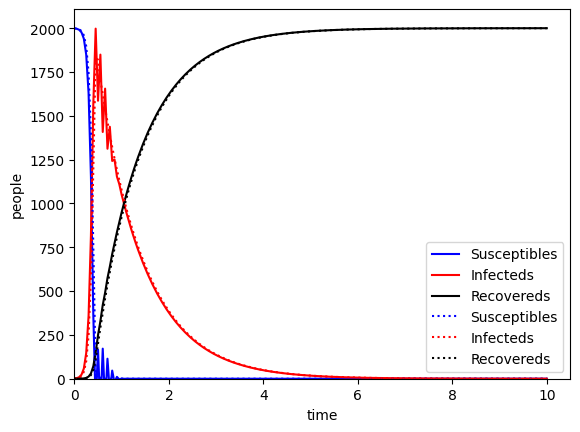

In [49]:
cM = [
  [3.1, 42.9],
  [4.8, 25]
]

S, I, R, T = SIRgroups([1999, 1999], [1, 1], [0,0], cM, 1, 10, 0.05)
fig, ax = plt.subplots()
ls = ['-',':']
for group in [0,1]:
    ax.plot(T,S[:,group], color='b', ls=ls[group], label='Susceptibles')
    ax.plot(T,I[:,group], color='r', ls=ls[group], label='Infecteds')
    ax.plot(T,R[:,group], color='k', ls=ls[group], label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

(0.0, 10.5)

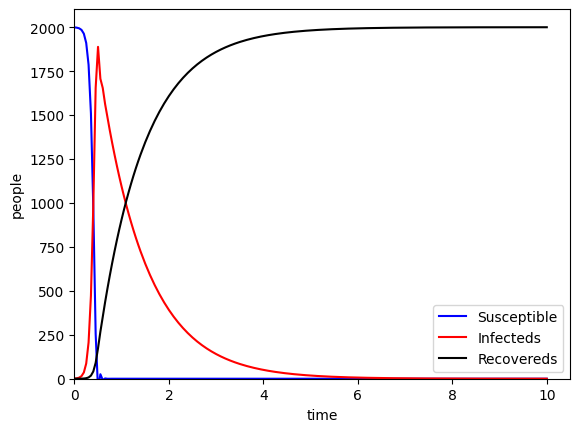

In [58]:
S, I, R, T = SIR(1999, 1, 0, 30, 1, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(T, S, color='b', label='Susceptible')
ax.plot(T, I, color='r', label='Infecteds')
ax.plot(T, R, color='k', label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom = 0)
ax.set_xlim(left=0)

(0.0, 6.3)

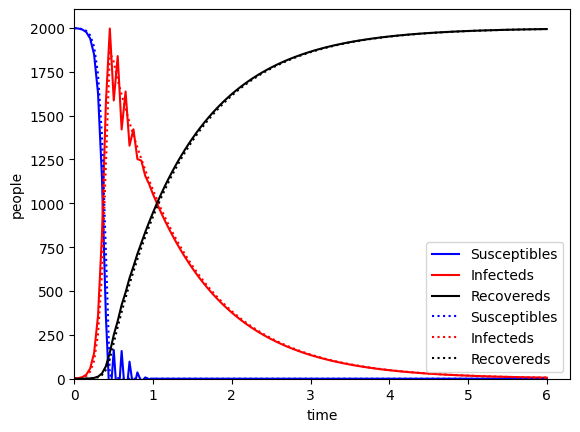

In [61]:
cM = [
  [3.0, 42.3],
  [5.0, 25.1]
]

S, I, R, T = SIRgroups([1999, 1999], [1, 1], [0,0], cM, 1, 6, 0.05)
fig, ax = plt.subplots()
ls = ['-',':']
for group in [0,1]:
    ax.plot(T,S[:,group], color='b', ls=ls[group], label='Susceptibles')
    ax.plot(T,I[:,group], color='r', ls=ls[group], label='Infecteds')
    ax.plot(T,R[:,group], color='k', ls=ls[group], label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

(0.0, 6.3)

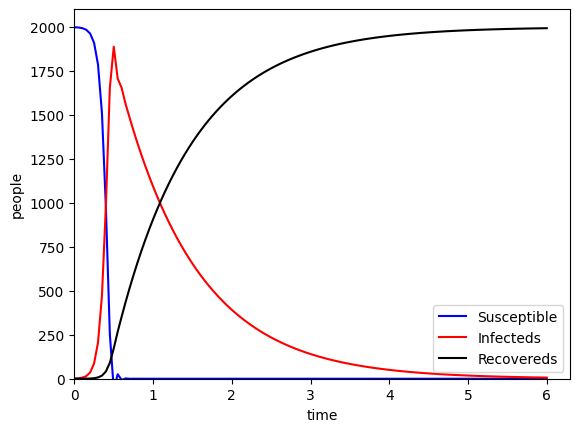

In [62]:
S, I, R, T = SIR(1999, 1, 0, 30, 1, 6, 0.05)

fig, ax = plt.subplots()
ax.plot(T, S, color='b', label='Susceptible')
ax.plot(T, I, color='r', label='Infecteds')
ax.plot(T, R, color='k', label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom = 0)
ax.set_xlim(left=0)